# 1. INTRODUCTION (Narrative Explanation)

In this section, we will examine the **1D Diffusion Equation** (or propagation equation) as described in Lecture 1, slide 13. This equation explains the spatial and temporal evolution of a substance (e.g., pollution or a chemical compound). The one-dimensional diffusion equation is given as:

$$
\frac{\partial c}{\partial t} = D \frac{\partial^2 c}{\partial x^2},
$$

where:

- $c(x, t)$: Concentration dependent on time and space (e.g., $\mathrm{mol/m^3}$).
- $D$: Diffusion coefficient ($\mathrm{m^2/s}$).

If at $t=0$, there is a “delta mass” located at $x=0$ with a total mass $M$, then under this initial condition, the solution is given by a Gaussian (normal) distribution:

$$
c(x, t) = \frac{M}{\sqrt{4 \pi D t}} \exp\left(-\frac{x^2}{4 D t}\right).
$$

This formula shows how the mass spreads over space as time progresses. As $t$ increases, the Gaussian curve broadens, and its maximum decreases, while conserving the total mass.

**Unit System and Axes:**
- The **x‑axis represents time** in seconds.
- A few fixed positions (in meters) are chosen to show how the concentration at those points changes over time.
- Concentration $c$ is expressed in $\mathrm{mol/m^3}$.
- Diffusion coefficient $D$ is in $\mathrm{m^2/s}$.
- Total mass $M$ is in $\mathrm{mol}$.

In this notebook, we will calculate the concentration at fixed positions for a range of time values using the **Pint** library for unit management and visualize the results with **Matplotlib**. The parameters are chosen to match the lecture slide ranges and to clearly show the time evolution of the Gaussian profile at different spatial points.


## 2. IMPORTING LIBRARIES 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pint

si = pint.UnitRegistry()

## 3. DEFINING PARAMETERS (Code Cell)

The following parameters were chosen:

- **Diffusion Coefficient ($D$)**: $1.0 \, \mathrm{m^2/s}$  
**Total Mass ($M$)**: Adjusted to $\sqrt{4 \pi}$ moles so that the peak value at $t = 1 \, \mathrm{s}$ equals $1.0 \, \mathrm{mol/m^3}$
- **Positions ($\text{pos}$)**: Three positions where the concentration will be tracked: $0 \, \mathrm{m}$, $3 \, \mathrm{m}$, and $5 \, \mathrm{m}$  
- **Time Range ($t$)**: From $0.1 \, \mathrm{s}$ to $5 \, \mathrm{s}$ (avoiding $t=0$ to prevent singularity)  

In [14]:
# Selecting parameters
D = 1.0 * si.meter**2 / si.second
M = (np.sqrt(4 * np.pi)) * si.mole  # Adjusted for c(0,1s) = 1.0 mol/m

# Fixed positions to track concentration evolution over time
pos = [0, 3, 5]  # in meters
pos = [p * si.meter for p in pos]

# Time range (avoid t=0 to prevent division by zero)
t = np.linspace(0.1, 5, 500) * si.second

## 4. DEFINING THE ANALYTICAL SOLUTION FUNCTION (Code Cell)

The Gaussian solution of the diffusion equation is defined as follows:

$$
c(x, t) = \frac{M}{\sqrt{4 \pi D t}} \exp\left(-\frac{x^2}{4 D t}\right).
$$

We will use the **Pint** library to ensure proper unit management for both inputs and outputs.


In [15]:
def concentration(x, t):
    """
    x: Position (pint.Quantity, e.g., meters)
    t: Time (pint.Quantity, e.g., seconds)
    D, M: Global parameters (pint.Quantity)
    return: Concentration (pint.Quantity, e.g., mol/m)
    """
    # c(x,t) = (M / sqrt(4 * pi * D * t)) * exp( - x^2 / (4 * D * t) )
    # M, D, t -> Computed while preserving Pint units
    c_val = (M / ((4 * np.pi * D * t) ** 0.5)) * np.exp(-x**2 / (4 * D * t))
    return c_val

## 5. CREATING AND SAVING THE GRAPH (Code Cell)

- The concentration $ c(x,t) $ is calculated for a fixed position and varying time (from 0.1 s to 5 s).  
- Curves are plotted for several fixed positions (0 m, 3 m, and 5 m).  
- The **x‑axis now represents time** (with units automatically added using **Pint**) and the y‑axis represents concentration.  
- A vector-format PDF output will be generated, and your name will be added to the graph.

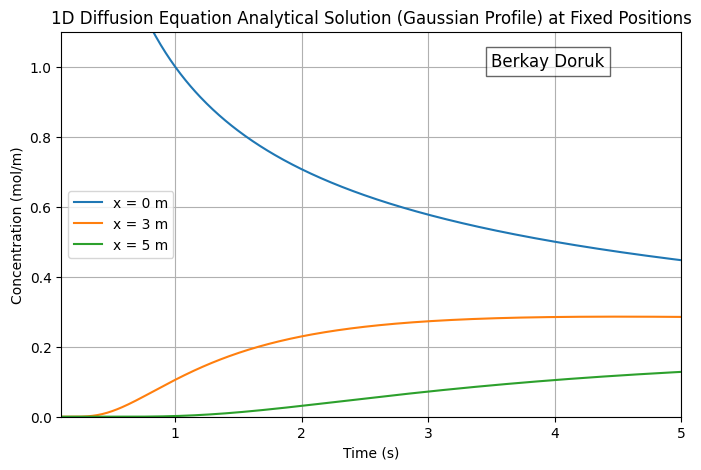

In [ ]:
plt.figure(figsize=(8, 5))

# Plot concentration curves for each fixed position as a function of time
for x_val in pos:
    c = concentration(x_val, t).to('mol/m')  # Ensure concentration is in "mol/m"
    plt.plot(t.magnitude, c.magnitude, label=f"x = {x_val:~P}")

# Add Pint units to the axis labels
plt.xlabel(f"Time ({t.units:~P})")
plt.ylabel(f"Concentration ({c.units:~P})")

# Graph limits
plt.xlim(t.magnitude[0], t.magnitude[-1])
plt.ylim(0, 1.1)  # Adding a bit of space above the peak

plt.title("1D Diffusion Equation Analytical Solution (Gaussian Profile) at Fixed Positions")
plt.grid(True)
plt.legend()

# Add name to the graph
plt.text(t.magnitude[-1]*0.7, 1.0, 'Berkay Doruk', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

#plt.savefig("diffusion_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()


# CONCLUSION

This Jupyter Notebook demonstrates the classical Gaussian solution to the one-dimensional diffusion equation (or heat equation) using unit management with the Pint library and data visualization with Matplotlib. In this version, the x‑axis represents time (from 0.1 s to 5 s), and concentration profiles $ c(x,t) $ are plotted for several fixed spatial positions (0 m, 3 m, and 5 m).

By examining the PDF output (diffusion_plot.pdf), you can observe that the concentration at each fixed position evolves over time according to the diffusion process.